# Introduksjon til programmering med Øystein Grøndahl
Vi skal se på hvordan man må tenke og på de grunnleggende elementene i programmering, og noen ferdige verktøy og elementer som vi kan modifisere til egen bruk.

Det finnes hele mastergradsprogrammer i programmering. Dette er bare en 2-timers introduksjon, men tilsvarer vel et semester eller to i forståelse. Husk at det alltid finnes flere måter å gjøre ting på, dette er ingen fasit.

En av de viktigste anvendelsene av dataverktøy er å automatisere handlinger som skal gjentas mange ganger. Dette gjøres med løkker (engelsk: loops). En annen er å sjekke om noe er sant, og bare hvis det er sant utføre en eller flere handlinger. Dettte gjøres med betingede valg (if-else-strukturer).

Alle handlingene en datamaskin kan utføre kan i prinsippet utføres av mennesker som følger samme instruksjoner og som har god nok tid.

## 3 objekter, hva er størst?
Datamaskinene kan ikke tenke selv, vi må gi dem instruksjoner, og vi må være presise. Det hjelper ikke å si "Den burde skjønt at jeg ikke mente det slik" eller "Den burde skjønt at det skulle stått et komma der og ikke et punktum" osv. Det er vårt ansvar å gi presise instruksjoner etter de reglene som gjelder i det aktuelle programmeringsspråket.

## Kortpoeng
Vi skal nå trekke kort fra en kortstokk og gi et visst antall poeng avhengig av reglene under. Vi skal huske poengene og legge sammen fra runde til runde og se hva totalen er. Sammenlikn reglene med flytskjemaet for å være sikker på at du skjønner hvordan reglene virker.

Hvis kortet er spar, legg til 2 poeng.
Ellers, hvis kortet er hjerter, legg til 1 poeng.
Ellers, trekk fra 1 poeng.

Hvis kortet er et bildekort (J, Q, K), legg til 5 poeng.
Ellers, legg til så mange poeng som tallet kortet representerer.

###### Tegn flytskjema for dette
Hva skjer med ess?

Hva skjer med joker? Bridgereglene?

### Testcase 1
H3: poeng = 4

SJ: poeng = 11

CK: poeng = 15

### Testcase 2
D4: poeng = 3

SQ: poeng = 10

H8: poeng = 19

In [7]:
poeng = 0

def kortpoeng(kort):
    """
    Kortene skal gis på formen 'HQ' for hjerter dame, 'C3' for kløver 3.
    C-clubs-kløver
    S-spades-spar
    H-hearts-hjerter
    D-diamonds-ruter
    K-king-konge
    Q-queen-dame
    J-jack-knekt
    """
    global poeng
    
    farge = kort[0]
    verdi = kort[1:]
    
    if farge == 'S':
        poeng += 2
    elif farge == 'H':
        poeng += 1
    else:
        poeng -= 1
    
    if verdi == 'K' or verdi == 'Q' or verdi == 'J':
        poeng += 5
    else:
        poeng += int(verdi)
    print('Du har nå',poeng,'poeng.')

In [10]:
kortpoeng('CK')

Du har nå 15 poeng.


## Stein, saks, papir
En lek vi alle kjenner: To personer spiller. Man velger stein, saks eller papir. Hvis spillerne velger det samme blir det uavgjort. Hvis de velger ulikt vinner en av dem. Stein slår saks, saks slår papir, og papir slår stein.

Hva må vi gjøre for å spille mot en datamaskin som kan velge tilfeldig blant de tre alternativene?

###### Skriv/tegn pseudocode

In [16]:
import random

bruker = input('Hva velger du? (stein, saks, papir) \n')
if bruker == 'stein' or bruker == 'saks' or bruker == 'papir':
    pc = random.choice(['stein', 'saks', 'papir'])
    print('PCen valgte',pc)
    if pc == bruker:
        print('Uavgjort.')
    else:
        if bruker == 'stein':
            if pc == 'saks':
                print('Brukeren vant!')
            else:
                print('PCen vant!')
        elif bruker == 'saks':
            if pc == 'papir':
                print('Brukeren vant!')
            else:
                print('PCen vant!')
        else:
            if pc == 'stein':
                print('Brukeren vant!')
            else:
                print('PCen vant!')
else:
    print('Ugyldig input.')

Hva velger du? (stein, saks, papir) 
lizard
Ugyldig input.


Hva med oppskalering? Hvis vi gjør det til rock-paper-scissors-lizard-Spock, hvordan må koden endres?

https://www.youtube.com/watch?v=Kov2G0GouBw

Scissors cuts paper

Paper covers rock

Rock crushes lizard

Lizard poisons Spock

Spock smashes scissors

Scissors decapitates lizard

Lizard eats paper

Paper disproves Spock

Spock vaporizes rock

Rock crushes scissors

Og hva med RPS-101?

In [ ]:
import random

alternativer = ['stein', 'saks', 'papir', 'øgle', 'Spock']

vinnere = {'stein': ['øgle', 'saks'], 'saks': ['papir', 'øgle'],\
          'papir': ['stein', 'Spock'], 'øgle': ['Spock', 'papir'],\
          'Spock': ['saks', 'stein']}

bruker = input('Hva velger du? '+str(alternativer)+'\n')
if bruker in alternativer:
    pc = random.choice(alternativer)
    print('PCen valgte',pc)
    if pc == bruker:
        print('Uavgjort.')
    else:
        if pc in vinnere[bruker]:
            print('Brukeren vant!')
        else:
            print('PCen vant!')
else:
    print('Ugyldig input.')

## Pengefordeling

### Lønn for husarbeid
3 barn, 50 kr/time, 2 timer. Lønnen skal fordeles fra en haug med kronestykker, en mynt til hvert barn om gangen.

### Flaskepant
Pengehaug, ukjent antall kronestykker. Ingen barn skal få mer enn noen av de andre.

### Løkker
Hvis vi vet hvor mange ganger noe skal gjøres bruker vi en for-løkke (for-loop). Hvis vi ikke vet hvor mange ganger noe skal gjøres, men vet når vi er ferdige, bruker vi en while-løkke (while-loop).

In [17]:
def pengedeling1(timelønn, timetall):
    barn1 = 0
    barn2 = 0
    barn3 = 0
    antallrunder = timelønn * timetall
    pengehaug = timelønn * timetall * 3
    for i in range(0, antallrunder):
        pengehaug -= 3
        barn1 += 1
        barn2 += 1
        barn3 += 1
    print('Nå er fordelingen ferdig. Det ble',pengehaug,'krone(r) igjen. Hvert barn fikk',barn1,'krone(r).')

In [21]:
def pengedeling2(pengehaug):
    barn1 = 0
    barn2 = 0
    barn3 = 0
    while pengehaug >= 3:
        pengehaug -= 3
        barn1 += 1
        barn2 += 1
        barn3 += 1
    print('Nå er fordelingen ferdig. Det ble',pengehaug,'krone(r) igjen. Hvert barn fikk',barn1,'krone(r).')

In [23]:
pengedeling2(17)

Nå er fordelingen ferdig. Det ble 2 krone(r) igjen. Hvert barn fikk 5 krone(r).


## Struktur for grunnleggende elementer

### If-else-strukturer
> if betingelse1:

>     handling1

>     handling2 osv.

> elif betingelse2:

>     handling3

>     handling4 osv.

> elif betingelse3:

>     handling5

>     handling6 osv.

> else:

>     handling7

>     handling8 osv.

Vi kan ha hvor mange "elif"-nivåer vi vil, og vi trenger ikke ha noen i det hele tatt. Vi trenger ikke ha med "else" til slutt, det er valgfritt.

### For-løkker
To muligheter:
> for element in liste eller liknende:

>     handling1

>     handling2 osv.

Eller:
> for i in range(start, stopp):

>     handling1

>     handling2 osv.

I prinsippet er metode 2 en variant av den første.

### While-løkker
> initialiser betingelse

> while betingelse er oppfylt:

>     handling1

>     handling2 osv.

(Disse handlingene MÅ kunne endre sannhetsverdien til betingelsen i løkken, ellers skaper vi uendelige løkker)

## Australske stemmer (preferansevalg)
Alle som stemmer MÅ stemme på ALLE kandidatene, i prioritert rekkefølge. Først sjekker man om noen har over 50 % av stemmene. I så fall har vedkommende vunnet. Om ikke sjekker man om alle gjenværende kandidater ligger likt. I så fall er det uavgjort. Om ikke stryker man den kandidaten med færrest stemmer (hvis det er flere som ligger likt på bunn strykes alle som ligger likt på bunn). Deretter sjekker man stemmesedlene til de personene som mistet "sin" kandidat, og gir deres stemme til neste navn på listen. Dette gjentas til en kandidat vinner valget eller til alle gjenværende kandidater ligger likt.

Kilde til oppgaven:
http://www.programming-challenges.com/pg.php?page=downloadproblem&probid=110108&format=html

### Eksempel
6 kandidater: Omar, Tobias, Ole Marius, Sara, Mari og Bjørn. 10 personer som stemmer.

#### Valgrunde 1
Stemmeseddel 1: Bjørn, Sara, Omar, Ole Marius, Tobias, Mari

Stemmeseddel 2: Sara, Ole Marius, Bjørn, Omar, Mari, Tobias

Stemmeseddel 3: Mari, Tobias, Bjørn, Sara, Ole Marius, Omar

Stemmeseddel 4: Ole Marius, Bjørn, Omar, Sara, Mari, Tobias

Stemmeseddel 5: Tobias, Sara, Mari, Ole Marius, Bjørn, Omar

Stemmeseddel 6: Omar, Ole Marius, Sara, Tobias, Mari, Bjørn

Stemmeseddel 7: Sara, Mari, Tobias, Omar, Bjørn, Ole Marius

Stemmeseddel 8: Mari, Sara, Omar, Bjørn, Ole Marius, Tobias

Stemmeseddel 9: Bjørn, Mari, Sara, Tobias, Ole Marius, Omar

Stemmeseddel 10: Tobias, Sara, Mari, Ole Marius, Bjørn, Omar

Resultat første runde: Bjørn 2, Sara 2, Mari 2, Tobias 2, Ole Marius 1, Omar 1

Ingen over 50 %. Ikke alle resterende ligger likt. Nederst er Ole Marius og Omar på 1. Derfor fjernes Ole Marius og Omar.

#### Valgrunde 2
Nå ser stemmesedlene ut som vist under:

Stemmeseddel 1: Bjørn, Sara, Tobias, Mari

Stemmeseddel 2: Sara, Bjørn, Mari, Tobias

Stemmeseddel 3: Mari, Tobias, Bjørn, Sara

Stemmeseddel 4: Bjørn, Sara, Mari, Tobias

Stemmeseddel 5: Tobias, Sara, Mari, Bjørn

Stemmeseddel 6: Sara, Tobias, Mari, Bjørn

Stemmeseddel 7: Sara, Mari, Tobias, Bjørn

Stemmeseddel 8: Mari, Sara, Bjørn, Tobias

Stemmeseddel 9: Bjørn, Mari, Sara, Tobias

Stemmeseddel 10: Tobias, Sara, Mari, Bjørn

Resultat andre runde: Bjørn 3, Sara 3, Mari 2, Tobias 2

Ingen over 50 %. Ikke alle resterende ligger likt. Nederst er Tobias og Mari på 2. Derfor fjernes Tobias og Mari.

#### Valgrunde 3
Nå ser stemmesedlene ut som vist under:

Stemmeseddel 1: Bjørn, Sara

Stemmeseddel 2: Sara, Bjørn

Stemmeseddel 3: Bjørn, Sara

Stemmeseddel 4: Bjørn, Sara

Stemmeseddel 5: Sara, Bjørn

Stemmeseddel 6: Sara, Bjørn

Stemmeseddel 7: Sara, Bjørn

Stemmeseddel 8: Sara, Bjørn

Stemmeseddel 9: Bjørn, Sara

Stemmeseddel 10: Sara, Bjørn


Resultat tredje runde: Sara 6, Bjørn 4

Sara har over 50 % og har vunnet valget.

Forståelig, men arbeidskrevende. Entydige instruksjoner og stort antall repetetive handlinger, dette kan automatiseres.


###### Skriv pseudokode med piler

In [24]:
def stemmesystem(kandidatliste, stemmeliste):
    """
    Kandidatliste er en liste med strings, hver string er navnet til en kandidat.
    
    Stemmeliste er en liste med lister med strings, hver liste med strings er en stemmeseddel.
    Hver string er navnet til en kandidat.
    """
    ferdig = False
    total = len(stemmeliste)
    
    
    while not ferdig:
        kandidatstemmer = {kandidat:0 for kandidat in kandidatliste}
        for stemmeseddel in stemmeliste:
            kandidatstemmer[stemmeseddel[0]] += 1
        
        for kandidat in kandidatstemmer:
            if kandidatstemmer[kandidat] > total/2:
                ferdig = True
                vinner = kandidat
        
        if ferdig == False:
            stemmer = kandidatstemmer[kandidatliste[0]]
            ferdig = True
            uavgjort = True
            for kandidat in kandidatstemmer:
                if kandidatstemmer[kandidat] != stemmer:
                    ferdig = False
                    uavgjort = False
        
        verdiliste = list(kandidatstemmer.values())
        laveste = min(verdiliste)
        sletteliste = [kandidat for kandidat in kandidatstemmer if kandidatstemmer[kandidat] == laveste]
        
        print('Her er stemmene etter denne valgrunden:')
        print(kandidatstemmer)
        print('De som slettes etter denne valgrunden er:')
        print(sletteliste,'\n')
        
        if not uavgjort:
            for navn in sletteliste:
                kandidatliste.remove(navn)
                for stemmeseddel in stemmeliste:
                    stemmeseddel.remove(navn)

        if len(kandidatliste) == 1:
            break
    
    if uavgjort:
        print('Det ble uavgjort mellom følgende kandidater: ',kandidatliste)
    else:
        print('Nå er valget avgjort. Vinneren er '+str(kandidatliste[0])+'.')

In [26]:
kandidater = ['Omar', 'Tobias', 'Ole Marius', 'Sara', 'Mari', 'Bjørn']
stemmeliste = [['Bjørn', 'Sara', 'Omar', 'Ole Marius', 'Tobias', 'Mari'], ['Sara', 'Ole Marius', 'Bjørn', 'Omar', 'Mari', 'Tobias'],\
               ['Mari', 'Tobias', 'Bjørn', 'Sara', 'Ole Marius', 'Omar'], ['Ole Marius', 'Bjørn', 'Omar', 'Sara', 'Mari', 'Tobias'],\
               ['Tobias', 'Sara', 'Mari', 'Ole Marius', 'Bjørn', 'Omar'], ['Omar', 'Ole Marius', 'Sara', 'Tobias', 'Mari', 'Bjørn'],\
               ['Sara', 'Mari', 'Tobias', 'Omar', 'Bjørn', 'Ole Marius'], ['Mari', 'Sara', 'Omar', 'Bjørn', 'Ole Marius', 'Tobias'],\
               ['Bjørn', 'Mari', 'Sara', 'Tobias', 'Ole Marius', 'Omar'], ['Tobias', 'Sara', 'Mari', 'Ole Marius', 'Bjørn', 'Omar']]
# Endre Bjørn fra 4 til 2 i stemmeseddel nr 8 for å få uavgjort.

stemmesystem(kandidater, stemmeliste)

Her er stemmene etter denne valgrunden:
{'Mari': 2, 'Sara': 2, 'Bjørn': 2, 'Tobias': 2, 'Omar': 1, 'Ole Marius': 1}
De som slettes etter denne valgrunden er:
['Omar', 'Ole Marius'] 

Her er stemmene etter denne valgrunden:
{'Mari': 2, 'Sara': 3, 'Bjørn': 3, 'Tobias': 2}
De som slettes etter denne valgrunden er:
['Mari', 'Tobias'] 

Her er stemmene etter denne valgrunden:
{'Sara': 5, 'Bjørn': 5}
De som slettes etter denne valgrunden er:
['Sara', 'Bjørn'] 

Det ble uavgjort mellom følgende kandidater:  ['Sara', 'Bjørn']


## Generere tabell med funksjonsverdier og plotte
Vi kan lage tabeller med x-verdier og y-verdier for en funksjon og plotte disse, f.eks. ved å bruke en løkke.

In [31]:
x = []
y = []
for i in range(-5, 6):
    x.append(i)
    y.append(i**2)
print(x)
print(y)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
[25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25]


<IPython.core.display.Javascript object>


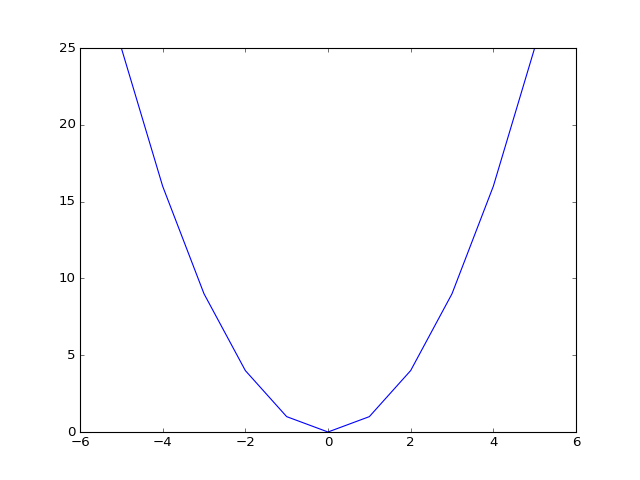

In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.figure()
plt.plot(x, y)
plt.show()

Metoden over er ok, men litt tungvint, særlig hvis vi vil ha x-verdier mellom heltallene, f.eks. 0.01, 0.02, 0.03 osv. Da kan vi bruke Numpy.

In [33]:
import numpy as np
x = np.linspace(0, 1, 101) # start, stopp, antall
print(x)

[ 0.    0.01  0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.2   0.21  0.22  0.23
  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31  0.32  0.33  0.34  0.35
  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43  0.44  0.45  0.46  0.47
  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]


<IPython.core.display.Javascript object>


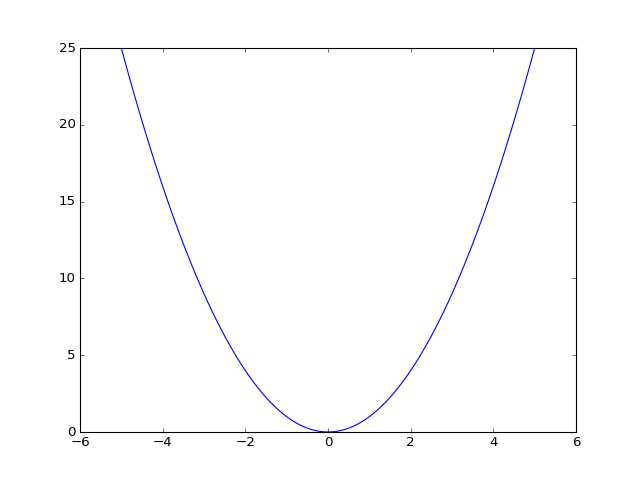

In [34]:
import numpy as np
x = np.linspace(-5, 5, 101) # start, stopp, antall
y = x**2 # Når x er et numpy-objekt kan vi ta hele
         # vektoren kvadrert og får ett og ett element kvadrert.
plt.figure()
plt.plot(x, y)
plt.show()

<IPython.core.display.Javascript object>


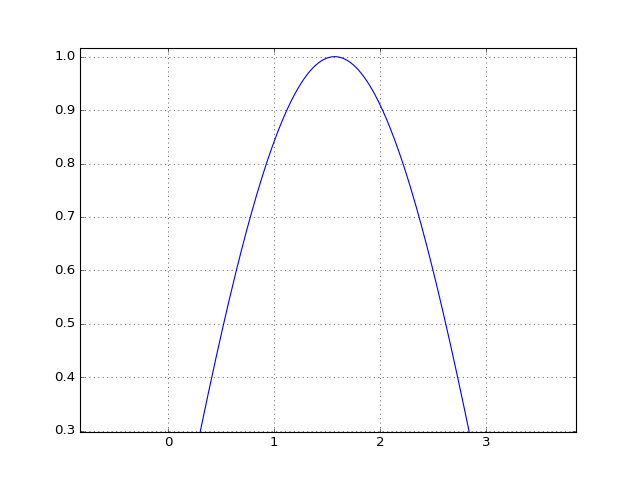

In [35]:
x = np.linspace(-2*np.pi, 2*np.pi, 1001) # start, stopp, antall
y = np.sin(x)
plt.figure()
plt.plot(x, y)
plt.grid()
plt.show()

### Vakre figurer og plots
Når vi ikke vet hvordan vi kan lage fine plots og hvilke kommandoer som finnes kan vi bruke andres eksempler og modifisere dem for å passe til våre data. Vi bruker matplotlibs galleri med eksempler:
http://matplotlib.org/gallery.html

Man kan også lese tutorialen:
http://matplotlib.org/users/pyplot_tutorial.html

Eller FAQen:
http://matplotlib.org/faq/usage_faq.html

Flere ressurser her:
http://matplotlib.org/resources/index.html

<IPython.core.display.Javascript object>


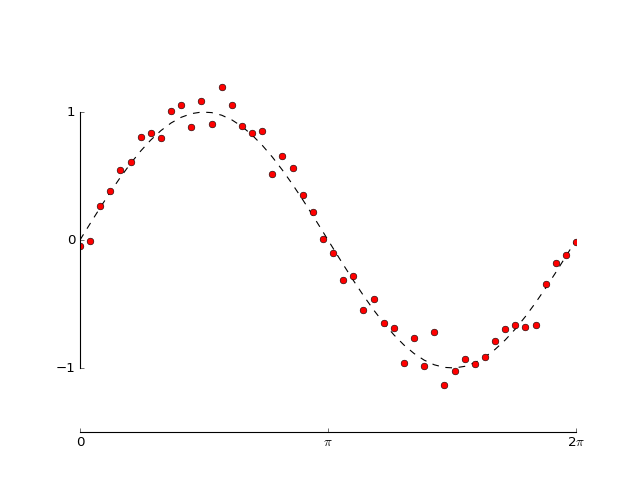

In [44]:
# http://matplotlib.org/examples/ticks_and_spines/spines_demo_bounds.html

import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)
y2 = y + 0.1 * np.random.normal(size=x.shape)

fig, ax = plt.subplots()
ax.plot(x, y, 'k--')
ax.plot(x, y2, 'ro')

# set ticks and tick labels
ax.set_xlim((0, 2*np.pi))
ax.set_xticks([0, np.pi, 2*np.pi])
ax.set_xticklabels(['0', '$\pi$', '2$\pi$'])
ax.set_ylim((-1.5, 1.5))
ax.set_yticks([-1, 0, 1])

# Only draw spine between the y-ticks
ax.spines['left'].set_bounds(-1, 1)
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

plt.show()

<IPython.core.display.Javascript object>


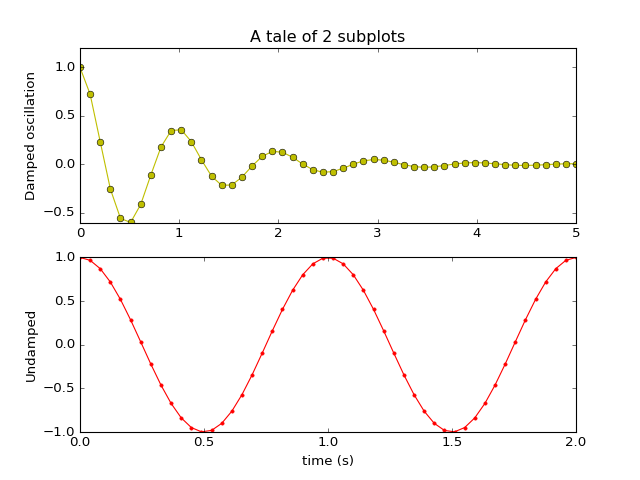

In [38]:
# http://matplotlib.org/examples/subplots_axes_and_figures/subplot_demo.html

"""
Simple demo with multiple subplots.
"""
import numpy as np
import matplotlib.pyplot as plt


x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'yo-')
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')

plt.subplot(2, 1, 2)
plt.plot(x2, y2, 'r.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

<IPython.core.display.Javascript object>


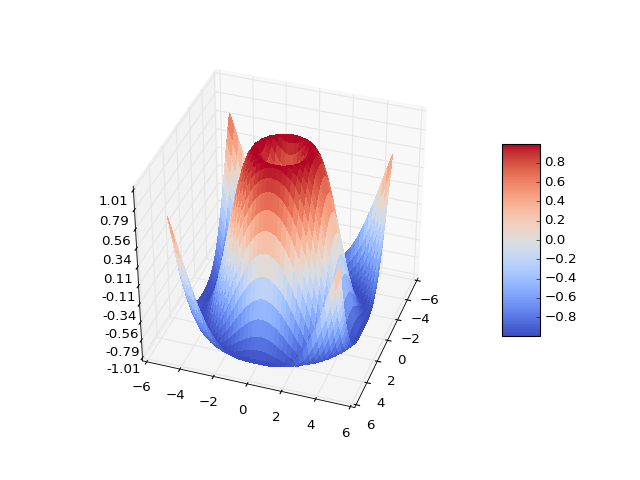

In [39]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

### Project Euler
Dette er en kilde til øvingsoppgaver som lar oss trene på numeriske programmeringsproblemer. Se f.eks. denne oppgaven: 
https://projecteuler.net/problem=5

Vi kan sjekke om et tall kan deles på 1, i så fall sjekke om det kan deles på 1, 2, 3, osv. til og med 10. Hvis det ikke går kan vi øke med 1 og sjekke neste tall. Slik kan vi fortsette helt til vi finner et tall som kan deles på alle tallene 1-10.

Kan være smart å legge inn en mulighet for å stoppe løkken i tilfelle vi har skrevet programmet feil slik at det ellers ville kjørt en uendelig løkke.

In [41]:
funnet = False
tallet = 0
antallrunder = 0

while funnet == False:
    antallrunder += 1
    tallet += 1
    divisorer = 0
    
    for n in range(1, 11):
        if tallet % n == 0:
            divisorer += 1

    if divisorer == 10:
        funnet = True

    if antallrunder == 10**4:
        print('Grense for antall runder overskredet, fant ikke passende tall.')
        break

print(tallet)

2520


Det vil naturligvis gå an å gjøre dette mye smartere, f.eks. ved å faktorisere tallene 1-10 og finne minste felles multiplum av faktorene direkte. Det er også mulig å modifisere programmet vårt litt, f.eks. ved å si at tallet må gå opp i både 7, 8 og 9, derfor må tallet vi ser etter være et multiplum av 504. Vi kan derfor nøye oss med å sjekke hver 504. verdi.

In [43]:
# import time
# start_time = time.time()

funnet = False
tallet = 0
antallrunder = 0

while funnet == False:
    antallrunder += 1
    tallet += 504
    divisorer = 0
    
    for n in range(1, 11):
        if tallet % n == 0:
            divisorer += 1

    if divisorer == 10:
        funnet = True

    if antallrunder == 10**4:
        print('Grense for antall runder overskredet, fant ikke passende tall.')
        break

print(tallet)

# print("--- %s seconds ---" % round(time.time() - start_time, 2))

2520
--- 0.00100207 seconds ---


Modifiser skriptet over for å finne minste felles multiplum av alle heltallene fra 1 til N.

## Interactive figures demo
http://www.nature.com/news/ipython-interactive-demo-7.21492

In [ ]:
Sortering av tall?

www.toptal.com/developers/sorting-algorithms

https://www.youtube.com/user/AlgoRythmics
    
    8, 29, 22, 15, 25, 2, 22, 54
    17 sammenlikninger
    11 bytter

In [ ]:
fizzbuzz